In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set the figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('remainder_temp.csv', index_col=0, parse_dates=True)
df.head()

,remainder
date,
2000-01-01,0.852970
2000-01-02,3.352809
2000-01-03,5.352649
2000-01-04,4.752489
2000-01-05,2.452329


In [56]:
df.head()

,remainder
date,
2000-01-01,0.852970
2000-01-02,3.352809
2000-01-03,5.352649
2000-01-04,4.752489
2000-01-05,2.452329


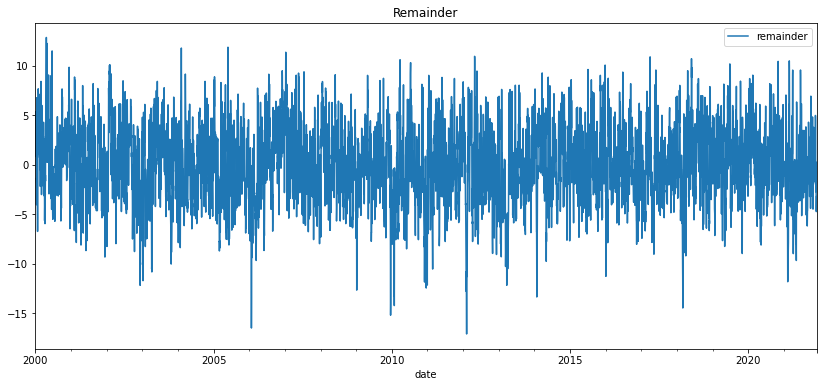

In [57]:
df.plot()
plt.title('Remainder')
plt.show()

In [58]:
df.mean()

remainder   -1.013777e-15
dtype: float64

In [59]:
# apply the augmented Dicky-Fuller stationarity test

# recap: The null hypothesis is that the time series is NOT-stationary
# i.e. a small p value, less than 0.05, means that you have a stationary series

def print_adf(data):
    """ 
    Prints the results of the augmented Dickey Fuller Test
    """
    adf_stats, p, used_lag, n_obs, levels, information_criterion = adfuller(data)
    
    print(f""" 
              adf_stats: {adf_stats}
              p: {p} 
              used lag: {used_lag} 
              number of observations: {n_obs}
            
              CI 99%: {levels['1%']}
              CI 95%: {levels['5%']}
              CI 90%: {levels['10%']}
              information criterion (AIC): {information_criterion}
            """)

In [60]:
print_adf(df['remainder'])

 
              adf_stats: -23.98289359015646
              p: 0.0 
              used lag: 5 
              number of observations: 7999
            
              CI 99%: -3.4311677771913693
              CI 95%: -2.8619013989176083
              CI 90%: -2.566962367942105
              information criterion (AIC): 35046.65974873771
            


In [61]:
print_adf(df.remainder)

 
              adf_stats: -23.98289359015646
              p: 0.0 
              used lag: 5 
              number of observations: 7999
            
              CI 99%: -3.4311677771913693
              CI 95%: -2.8619013989176083
              CI 90%: -2.566962367942105
              information criterion (AIC): 35046.65974873771
            


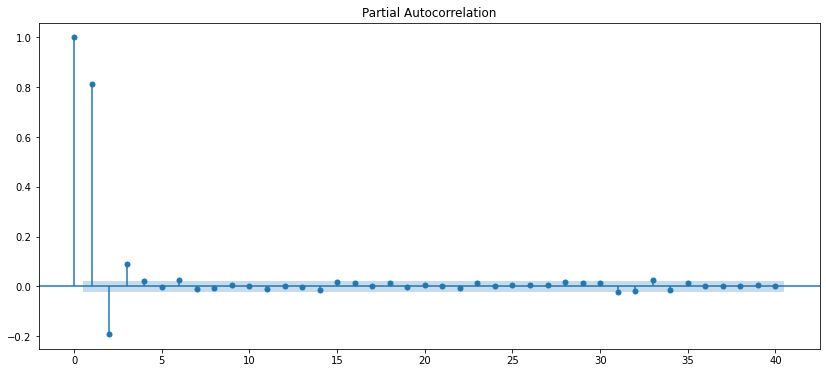

In [62]:
# Plot the partial autocorrelation function
plot_pacf(df['remainder']);

plt.show()

In [63]:
# Use ar_select_order - brute force method that tries different models and takes the best one

order = ar_select_order(df, maxlag=20, old_names=False)

In [64]:
# How many lags does ar_select_order suggest?

order.ar_lags

array([1, 2, 3])

In [65]:
# Fit a statsmodels AutoReg model

ar_model = AutoReg(df['remainder'], lags=4, old_names=False).fit()

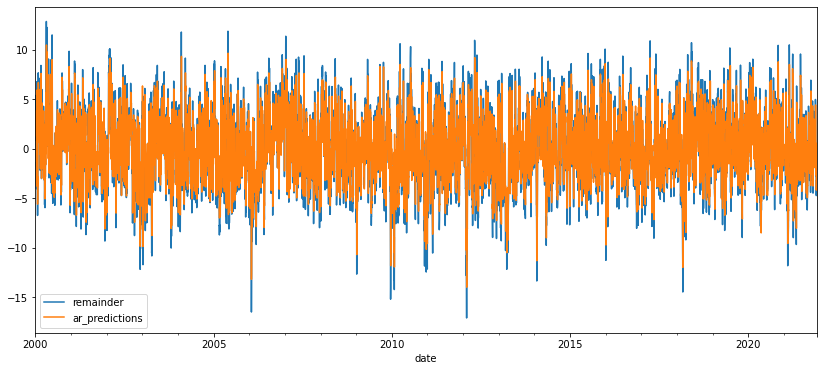

In [66]:
# Plot the prediction

df.plot()
plt.plot(ar_model.predict(), label='ar_predictions')
plt.legend()
plt.show()

In [67]:
# Fit an ARIMA model
arima_model = ARIMA(df['remainder'], order=(1,0,1)).fit()

# order defines (#of AR lags, I, #of MA lags); (p,d,q)
# (1,0,1) - means that we have 1 AR lag and 1 MA lag

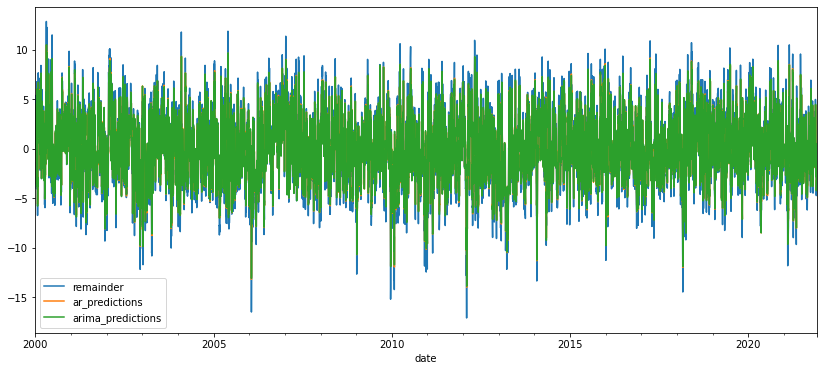

In [68]:
# Plot all time series
df.plot()
plt.plot(ar_model.predict(), label='ar_predictions')
plt.plot(arima_model.predict(), label='arima_predictions')
plt.legend()
plt.show()

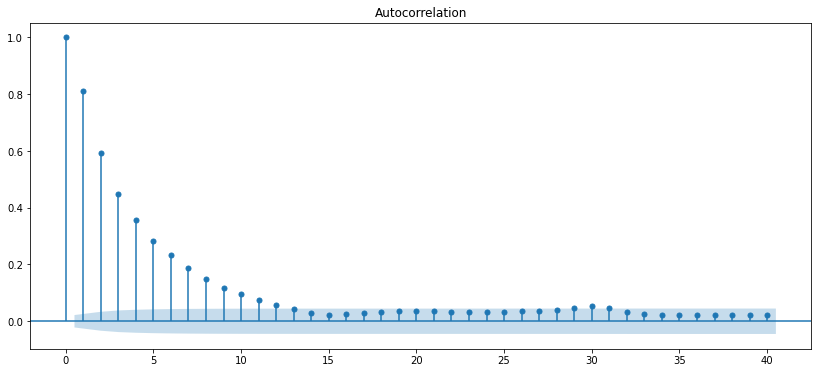

In [69]:
# Plot the autocorrelation between lags
plot_acf(df);

plt.show()

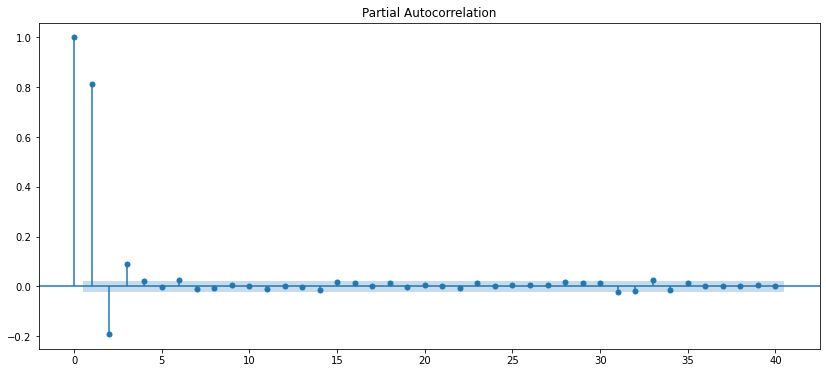

In [70]:
# Plot the partial autocorrelation between lags
plot_pacf(df);

plt.show()

In [71]:
from pmdarima.arima import auto_arima

In [72]:
# ARIMA(p,d,q)

# p = number of AR lags
# q = number of MA lags
# d = the order of integration

auto_arima_model = auto_arima(df['remainder'], start_p=0, start_q=0, max_p=10, max_q=10)


In [73]:
auto_arima_model

ARIMA(order=(3, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# Building the model on our train data

In [21]:
import numpy as np

In [22]:
data_train = pd.read_csv('temp_train.csv', parse_dates=True, index_col=0)
data_train = data_train[['temp_c']]


In [23]:
data_train.head()

,temp_c
date,
2000-01-01,1.4
2000-01-02,3.9
2000-01-03,5.9
2000-01-04,5.3
2000-01-05,3.0


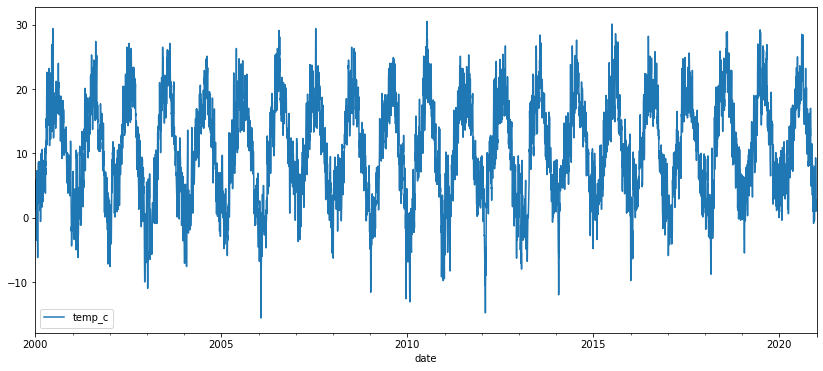

In [24]:
data_train.plot()

plt.show()

In [25]:
data_train.mean()

temp_c    10.638652
dtype: float64

In [26]:
data_train['diff1'] = data_train['temp_c'].diff()

data_train.head()

,temp_c,diff1
date,,
2000-01-01,1.4,NaN
2000-01-02,3.9,2.5
2000-01-03,5.9,2.0
2000-01-04,5.3,-0.6
2000-01-05,3.0,-2.3


In [27]:
print_adf(data_train['diff1'].dropna())

 
              adf_stats: -29.284795317986998
              p: 0.0 
              used lag: 16 
              number of observations: 7653
            
              CI 99%: -3.431204762151373
              CI 95%: -2.86191774126888
              CI 90%: -2.566971067169163
              information criterion (AIC): 33387.70230888445
            


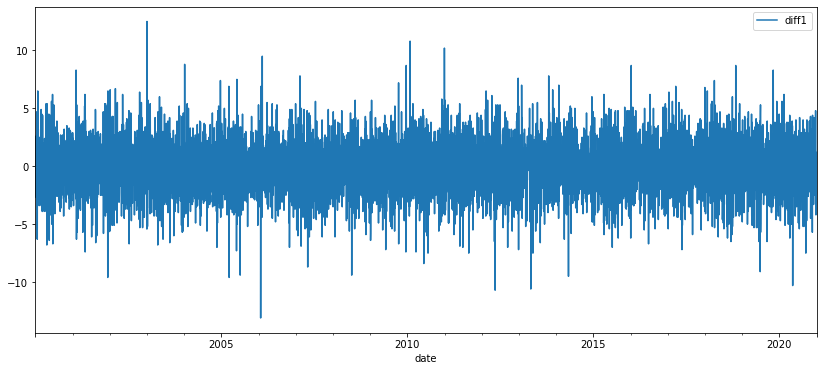

In [28]:
station_data_train = data_train[['diff1']].dropna()
station_data_train.plot()

plt.show()

In [29]:
station_data_train.head()

,diff1
date,
2000-01-02,2.5
2000-01-03,2.0
2000-01-04,-0.6
2000-01-05,-2.3
2000-01-06,-0.9


In [30]:
auto_arima_model = auto_arima(data_train['temp_c'], start_p=0, start_q=0, max_p=15, max_q=15, max_d=3)

In [31]:
auto_arima_model

ARIMA(order=(15, 0, 1), scoring_args={}, suppress_warnings=True)

In [32]:
model = ARIMA(data_train['temp_c'], order=(15,0,1)).fit()

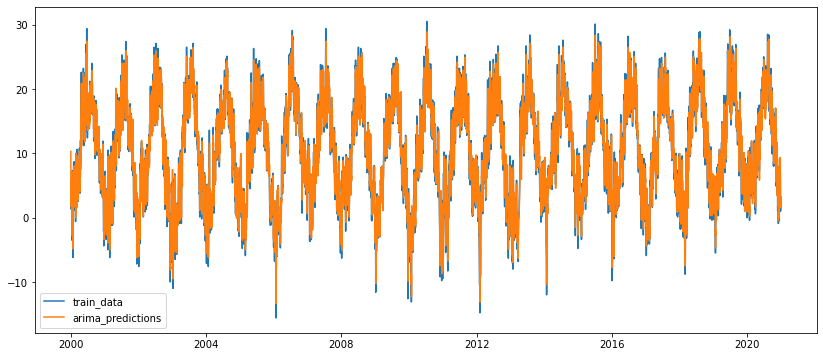

In [33]:
plt.plot(data_train['temp_c'], label='train_data')
plt.plot(model.predict(), label='arima_predictions')  # this is called in-sample predictions, predictions on test data
plt.legend()

plt.show()

In [34]:
seasonal_dummies = pd.get_dummies(data_train.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(data_train.index)

data_train = data_train.join(seasonal_dummies)


In [35]:
data_train.head()

,temp_c,diff1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,month_22,month_23,month_24,month_25,month_26,month_27,month_28,month_29,month_30,month_31
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,1.4,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-02,3.9,2.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,5.9,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-04,5.3,-0.6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-05,3.0,-2.3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# exog in statsmodels ARIMA is the same as X in any sklearn model

model_season = ARIMA(data_train['temp_c'], order=(15,0,1), exog=seasonal_dummies).fit()


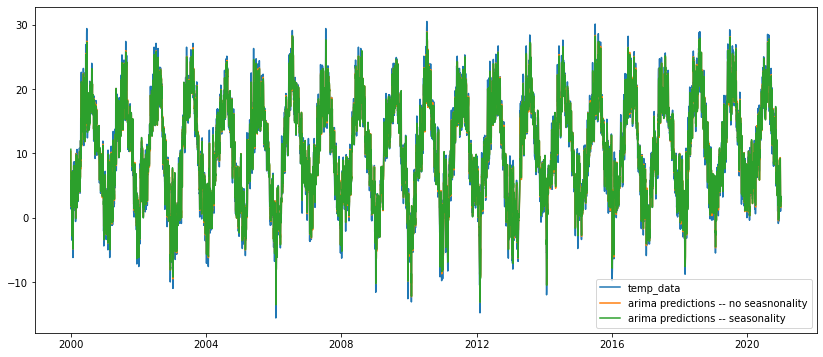

In [37]:
plt.plot(data_train['temp_c'], label='temp_data')
plt.plot(model.predict(), label='arima predictions -- no seasnonality')
plt.plot(model_season.predict(), label='arima predictions -- seasonality')
plt.legend()

plt.show()

In [38]:
rmse_no_seasonality = np.sqrt(mean_squared_error(data_train['temp_c'], model.predict()))

rmse_seasonality = np.sqrt(mean_squared_error(data_train['temp_c'], model_season.predict()))



In [39]:
rmse_no_seasonality, rmse_seasonality

(2.1509623421788877, 2.1505594517417723)

In [40]:
model.forecast()

2021-01-01    2.947876
Freq: D, dtype: float64

In [41]:
seasonal_dummies.iloc[0]

month_2     0
month_3     0
month_4     0
month_5     0
month_6     0
month_7     0
month_8     0
month_9     0
month_10    0
month_11    0
month_12    0
month_13    0
month_14    0
month_15    0
month_16    0
month_17    0
month_18    0
month_19    0
month_20    0
month_21    0
month_22    0
month_23    0
month_24    0
month_25    0
month_26    0
month_27    0
month_28    0
month_29    0
month_30    0
month_31    0
Name: 2000-01-01 00:00:00, dtype: uint8

In [42]:
model_season.forecast(exog=seasonal_dummies.iloc[0])

2021-01-01    2.835761
Freq: D, dtype: float64

In [43]:
model.predict(start='2021-01-01', end='2021-12-01')

2021-01-01    2.947876
2021-01-02    3.235847
2021-01-03    3.554309
2021-01-04    3.699719
2021-01-05    3.738910
                ...   
2021-11-27    9.831400
2021-11-28    9.835128
2021-11-29    9.838826
2021-11-30    9.842494
2021-12-01    9.846133
Freq: D, Name: predicted_mean, Length: 335, dtype: float64

In [44]:
seasonal_dummies.iloc[0:12]

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,...,month_22,month_23,month_24,month_25,month_26,month_27,month_28,month_29,month_30,month_31
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-02,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-04,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-05,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-06,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-07,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-08,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-09,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
 model_season.predict(start='2021-01-01', end='2021-12-01', exog=seasonal_dummies.iloc[0:335])

2021-01-01     2.835761
2021-01-02     3.169419
2021-01-03     3.633176
2021-01-04     3.685506
2021-01-05     3.610654
                ...    
2021-11-27    10.524615
2021-11-28    10.517958
2021-11-29    10.597627
2021-11-30    10.471919
2021-12-01    10.403357
Freq: D, Name: predicted_mean, Length: 335, dtype: float64

In [46]:
# test_seasonality_pred ???

In [47]:
temp_test = pd.read_csv('temp_test.csv', parse_dates=True, index_col=0)


In [48]:
# add predictions from both models

temp_test['predictions'] = model.predict(start='2021-01-01', end='2021-12-01')

temp_test['predictions_season'] =  model_season.predict(start='2021-01-01', 
                                                           end='2021-12-01', exog=seasonal_dummies.iloc[0:335])

In [49]:
temp_test

,temp_c,predictions,predictions_season
date,,,
2021-01-01,2.1,2.947876,2.835761
2021-01-02,1.1,3.235847,3.169419
2021-01-03,0.6,3.554309,3.633176
2021-01-04,0.8,3.699719,3.685506
2021-01-05,1.7,3.738910,3.610654
...,...,...,...
2021-11-26,4.4,9.827642,10.516457
2021-11-27,1.9,9.831400,10.524615
2021-11-28,1.9,9.835128,10.517958


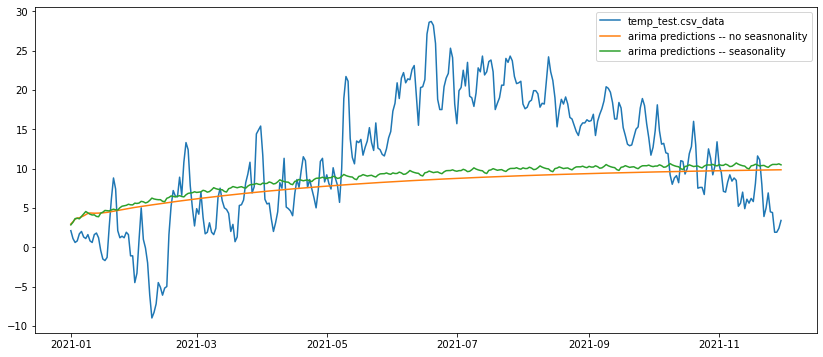

In [50]:
plt.plot(temp_test['temp_c'], label='temp_test.csv_data')
plt.plot(temp_test['predictions'], label='arima predictions -- no seasnonality')
plt.plot(temp_test['predictions_season'], label='arima predictions -- seasonality')
plt.legend()

plt.show()

In [51]:
model.predict(start='2021-01-01', end='2021-12-01').iloc[-1]

9.84613252152101

In [52]:
rmse_no_seasonality_t = np.sqrt(mean_squared_error(temp_test['temp_c'], temp_test['predictions']))

rmse_seasonality_t = np.sqrt(mean_squared_error(temp_test['temp_c'], temp_test['predictions_season']))


In [53]:
rmse_no_seasonality_t

7.545992448941838

In [54]:
rmse_seasonality_t

7.137402230175782